(<matplotlib.image.AxesImage at 0x29fbc085fd0>, Text(0.5, 1.0, 'Original'))

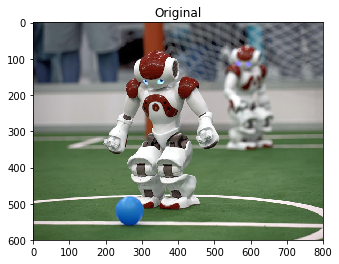

In [3]:

import numpy as np
from matplotlib import pyplot as plt
import cv2
def HSV(src_h,src_s,src_v) :   
    
    # Orange Mask
    Lower_H = 10
    Upper_H = 20
    
    # Satuation 20%
    mask_h = cv2.inRange(src_h,Lower_H,Upper_H)
    #cv2.imshow('mask_h',mask_h)
    ret,mask_s = cv2.threshold(src_s,0.20*255,255,cv2.THRESH_BINARY) 
    ret,mask_v = cv2.threshold(src_v,0.80*255,255,cv2.THRESH_BINARY)
    
    # Combine two masks    
    mask_hsv = cv2.bitwise_and(mask_h,mask_s,mask_v)
           
    return mask_hsv
dir = './football.jpg'
src_color = cv2.imread( dir )
src_grey = cv2.cvtColor( src_color, cv2.COLOR_BGR2HSV )

plt.imshow(src_color), plt.title("Original")

(<matplotlib.image.AxesImage at 0x29fbc1352e8>, Text(0.5, 1.0, 'Result HSV'))

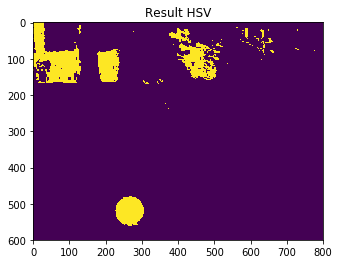

In [4]:
img_hsv = cv2.cvtColor( src_color, cv2.COLOR_BGR2HSV )

src_h = img_hsv[:,:,0]
src_s = img_hsv[:,:,1]
src_v = img_hsv[:,:,2]
mask_hsv = HSV(src_h,src_s,src_v)

plt.imshow(mask_hsv), plt.title("Result HSV")

(<matplotlib.image.AxesImage at 0x29fbf194940>, Text(0.5, 1.0, 'seg_result'))

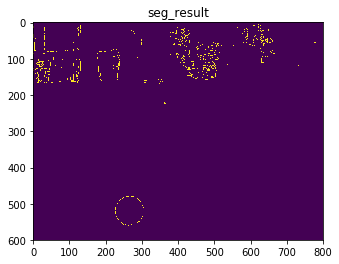

In [5]:
canny_th1 = 30
canny_th2 = 80

seg_canny = cv2.Canny( mask_hsv, canny_th1, canny_th2 )
seg_result = seg_canny

plt.imshow(seg_result), plt.title("seg_result")

(<matplotlib.image.AxesImage at 0x29fbf1fc668>, Text(0.5, 1.0, 'morph_result'))

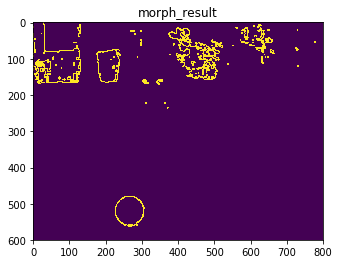

In [6]:
ksize = 3
cnt_erode = 0
cnt_dilate = 1
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (ksize,ksize) )
morph_result = cv2.erode ( seg_result, kernel, iterations=cnt_erode )
morph_result = cv2.dilate ( morph_result, kernel, iterations=cnt_dilate )

plt.imshow(morph_result), plt.title("morph_result")

(<matplotlib.image.AxesImage at 0x29fbf263710>,
 Text(0.5, 1.0, 'drawContours: outline'))

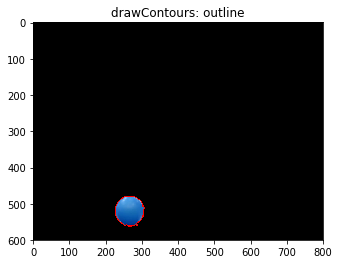

In [7]:
contours,hierarchy = cv2.findContours( morph_result,
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_NONE )

biggest_contour = sorted( contours,
                          key = cv2.contourArea,
                          reverse = True )[1]       # extract only the first (biggest) contour from the sorted list
src_color = cv2.drawContours ( src_color,
                                biggest_contour,  # draw one specific contour in the variable
                                -1,
                                (255,0,0),
                                thickness=3 )
mask = np.zeros_like( src_grey )
cv2.drawContours ( mask, 
                  [ biggest_contour ], 
                  0, 
                  (255,255,255), 
                  thickness=-1 )
result = src_color.copy()
result [ mask == 0 ] = 0

plt.imshow(result), plt.title("drawContours: outline")